# Data Bootcamp Final Project: ABC's The Bachelor

## Laura Capucilli, Michael Trentham, and Carter Stone

Since it’s premiere in 2002, ABC’s The Bachelor franchise has invited audiences across the U.S. to watch as single, young men and women attempt to find true love among a pool of eligible bachelors and bachelorettes, all on national TV and within a timeframe of a few months. The show begins with a single bachelor / bachelorette and typically up to 30 contestants. Each week, the bachelor / bachelorette narrows the pool of potential future partners through an elimination round, the Rose Ceremony. Ultimately, the season is expected to end in a proposal, the recipient of which remains a toss up between two men / women until the finale. 

Given the variance in the outcome of relationships that began on the show, our final project analyzes data from nearly 30 seasons of the show with several questions in mind: Are there commonalities or differences among contestants, bachelors, and bachelorettes? Are there patterns that determine the ultimate success or failure of a relationship?

## I. Setting Up

In [3]:
#We will begin by importing several packages to use for our analysis:

import sys
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
%matplotlib inline

In [4]:
# Check versions
print('Python version: ', sys.version)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', mpl.__version__)
print('Today: ', dt.date.today())

Python version:  3.6.0 |Anaconda 4.3.0 (x86_64)| (default, Dec 23 2016, 13:19:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Pandas version:  0.19.2
Matplotlib version:  2.0.0
Today:  2017-05-09


In [5]:
# Import Bachelor and Bachelorette datasets
url1 ='https://github.com/NYUDataBootcamp'
url2 = '/Materials/blob/master/Data/Bachelor_Data.xlsx?raw=true'
url = url1+url2

df = pd.read_excel(url, sheetname = 0) # Sheet 1: Bachelors/Bachelorettes
df2 = pd.read_excel(url, sheetname = 1) # Sheet 2: Female contestants
df3 = pd.read_excel(url, sheetname = 2) # Sheet 3: Male contestants 

In [6]:
# Check import for each Sheet

df.shape

(29, 12)

In [7]:
df2.shape

(315, 7)

In [8]:
df3.shape

(206, 7)

In [109]:
df.dtypes # 'Wiki Data' refers to whether or not there is information about the season available on Wikipedia. 

Show                    object
Season                   int64
Premiered       datetime64[ns]
Name                    object
Profile                 object
Winner                  object
Runner(s)-Up            object
Proposal                object
Success                 object
Wiki Data               object
Birthday                object
Height                  object
dtype: object

In [10]:
df2.dtypes

Season          int64
Year            int64
Name           object
Age           float64
Hometown       object
Occupation     object
Eliminated     object
dtype: object

In [11]:
df3.dtypes

Season         int64
Year           int64
Name          object
Age            int64
Hometown      object
Occupation    object
Eliminated    object
dtype: object

In [12]:
df.head(2)

,Show,Season,Premiered,Name,Profile,Winner,Runner(s)-Up,Proposal,Success,Wiki Data,Birthday,Height
0,Bachelor,1,2002-03-25,Alex Michel,Management consultant,Amanda Marsh,Trista Rehn,No,No,No,1970-08-10 00:00:00,"6'0"""
1,Bachelor,2,2002-09-25,Aaron Buerge,Vice President of a chain of family-owned banks,Helene Eksterowicz,Brooke Smith,Yes,No,No,1974-04-22 00:00:00,"6'0"""


In [13]:
df2.head(2)

,Season,Year,Name,Age,Hometown,Occupation,Eliminated
0,5,2004,Jessica Bowlin,22.0,"Huntington Beach, California",Student,Winner
1,5,2004,Tara Huckeby,23.0,"Shawnee, Oklahoma",General contractor,Week 7


In [14]:
df3.head(2)

,Season,Year,Name,Age,Hometown,Occupation,Eliminated
0,2,2004,Ian McKee,29,"New York, NY",Equity Research Sales,Winner
1,2,2004,Matthew Hickl,28,"Friendswood, TX",Pharmaceutical Sales Rep,Episode 8


## II. Contestants' Age 


We began by looking at the average age of contestants at different stages of the competition:

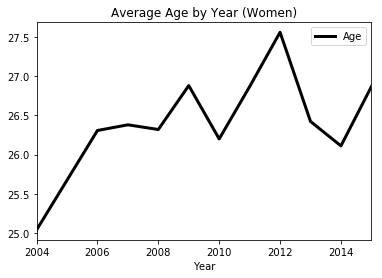

In [15]:
# Clean up and shape Sheet 2 (Female Contestants dataframe)
df2_mean = df2[['Year','Age']] 
df2_mean = df2_mean.groupby('Year')
df2_mean = df2_mean.mean()
df2_mean.plot(linewidth=3, color='black', title= 'Average Age by Year (Women)')

The chart above shows the average age of female contestants for each year. While the average age of contestants is slightly older in recent years compared to early seasons of the show, the average age has remained fairly consistent (within 1 year) over the last decade. 

Next, we'll explore how age relates to the week in which the contestants left the competition: 

In [16]:
# Shaping the data further

df2_AgeWeekF = df2[['Age', 'Eliminated']]
df2_AgeWeekF = df2_AgeWeekF.groupby('Eliminated')
df2_AgeWeekF = df2_AgeWeekF.mean()

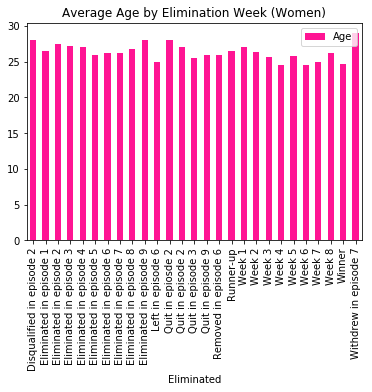

In [121]:
# Plotting our data
df2_AgeWeekF.plot(kind='bar', color = 'deeppink', title="Average Age by Elimination Week (Women)")

Looks like we have more cleaning to do. We'll use the following code to make our x-axis more consistent:

In [18]:
df2_clean = df2

In [19]:
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Withdrew in episode', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Eliminated in episode', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Quit in episode', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Left in episode', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Disqualified in episode', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Removed in episode', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Quit in epiosde', 'Week')
df2_clean['Eliminated'] = df2_clean['Eliminated'].str.replace('Runner-up', 'Week Runner-Up')

In [72]:
AgeWeekF = df2_clean[['Age', 'Eliminated']]
AgeWeekF = AgeWeekF.groupby('Eliminated')
AgeWeekF = AgeWeekF.mean()

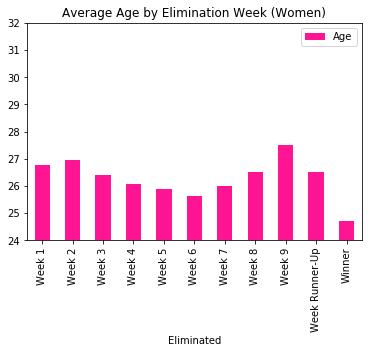

In [120]:
AgeWeekF.plot(kind='bar', ylim=[24,32], color = 'deeppink', title="Average Age by Elimination Week (Women)")

Here, we can see that ages 26 and 27 dominate the elimination age for the first few weeks. This is interesting because it might suggest that the bachelor is interested in a polarized age demographic at first. He seems to be ruling out much of the middle ground. That said, it could also be the case that the bachelor is keeping only the contestants in the polarized age demographic, but that their average ages are 26 and 27. 

In the middle weeks, the younger contestants seem to be targeted more for elimination. We think a major takeaway here is that the Bachelor may be becoming more serious about the process as he is moving along, and thus is elimnating more immature contestants (contestants not yet ready for marriage).

We'll now look at the same information using the male contestant dataframe (Sheet 3):

In [22]:
df3_clean = df3.set_index('Season')

In [23]:
df3_clean['Eliminated']=df3_clean['Eliminated'].str.replace('Episode', 'Week')
df3_clean['Eliminated']=df3_clean['Eliminated'].str.replace('Eliminated in episode', 'Week')
df3_clean['Eliminated']=df3_clean['Eliminated'].str.replace('Removed in episode', 'Week')
df3_clean['Eliminated']=df3_clean['Eliminated'].str.replace('Quit in episode', 'Week')
df3_clean['Eliminated']=df3_clean['Eliminated'].str.replace('Withdrew in episode', 'Week')
df3_clean['Eliminated']=df3_clean['Eliminated'].str.replace('Runner-up', 'Week Runner-up')

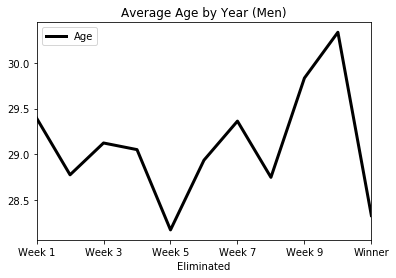

In [24]:
AgeWeekM = df3_clean[['Age', 'Eliminated']]
AgeWeekM = AgeWeekM.groupby('Eliminated')
AgeWeekM = AgeWeekM.mean()
AgeWeekM.plot(linewidth=3, color = 'black', title='Average Age by Year (Men)')

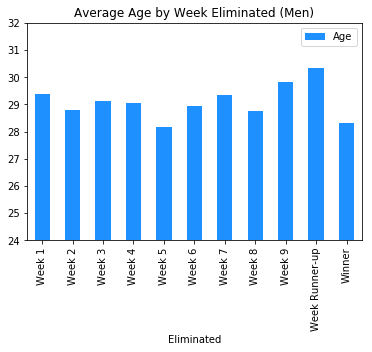

In [25]:
AgeWeekM.plot(kind='bar', ylim=[24,32], color = 'dodgerblue', title='Average Age by Week Eliminated (Men)')

There's not as much rhyme or reason to this chart; however, we can see that the Bachelorette seems to keep around an older and younger male contestant towards the end of the show.  Also, it appears that the winners tend to be on the younger side. 

Next, we will compare the data for male and female contestants:

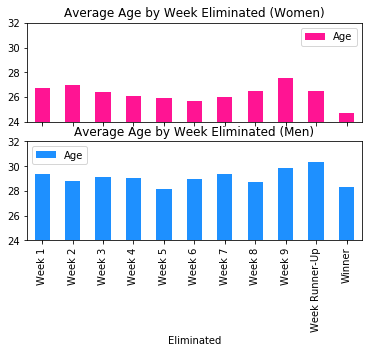

In [122]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, sharex = True, sharey = True)

AgeWeekM.plot(kind='bar', ax=ax[1], ylim=(24,32), color = 'dodgerblue', title = 'Average Age by Week Eliminated (Men)')
AgeWeekF.plot(kind='bar', ax=ax[0], color ='deeppink', title='Average Age by Week Eliminated (Women)')

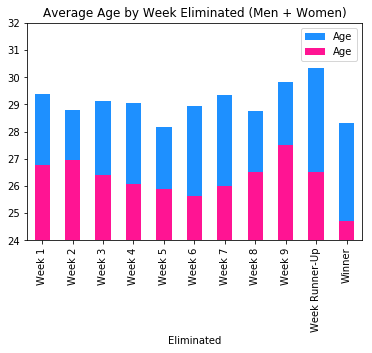

In [123]:
fig, ax = plt.subplots()
AgeWeekM.plot(ax=ax, kind='bar', ylim=[24,32], color ='dodgerblue', title='Average Age by Week Eliminated (Men + Women)')
AgeWeekF.plot(ax=ax, kind='bar', ylim=[24,32], color ='deeppink')

The biggest takeaway here is that the ages of contestents are far younger for women than men in general. Other than the average age being significantly different, the two charts show surprisingly similar patterns. The fluctuations are oddly identical. There is most likely some sort of social psychology trend at play here.

## III. Proposals and Marriages

We will now look at the end results of both the Bachelor and the Bachelorette. How many seasons result in a proposal? Are those engagements likely to result in marriage or in a break-up after the show ends? Is there any difference between bachelor and bachelorette seasons?

In [49]:
df_proposal = df[['Proposal', 'Show']]
df_proposal.head(2)

,Proposal,Show
0,No,Bachelor
1,Yes,Bachelor


In [50]:
df_proposal = df_proposal.groupby(['Show', 'Proposal']).size()
df_proposal = df_proposal.unstack()

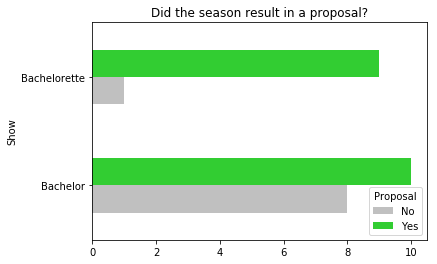

In [69]:
df_proposal.plot(kind='barh', color = ['silver', 'limegreen'], title='Did the season result in a proposal?')

The key point gathered here is that the men (or bachelors) are far less likely to propose at the end of a season. We think that much of this has to do with their overall intent when beginning the process of applying for the show. Perhaps the women genuinely want to get engaged and the men seem more keen on becoming a TV personality. There is much discussion during the show about whether or not contestents are there for the "right reasons". Given the chart above, we might assume that more women are there for the right reasons than men, though it of course could be the case that the bachelors did not make a connection with their contestents with greater frequency than the bachelorettes with their contestents.

In [52]:
df_marriage = df[['Success', 'Show']] 
df_marriage = df_marriage.groupby(['Show', 'Success']).size()
df_marriage = df_marriage.unstack()

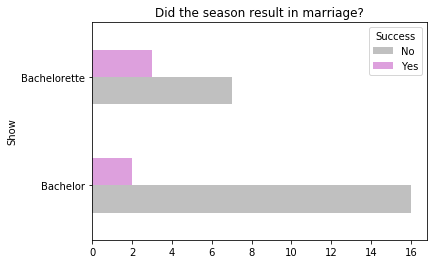

In [70]:
df_marriage.plot(kind='barh', color=['silver', 'plum'], title='Did the season result in marriage?')

This chart is pretty illuminating. It illustrates that the Bachelorette women are far more succesful in choosing a partner. Of the 9 proposals on the Bachelorette, 3 resulted in marriage. Of the 10 proposals on the Bachelor, only 2 have resulted in marriage. Again, this could be related to the fact that the women who enter onto the show are far more dedicated to finding love and a life partner. 

## IV. Occupations

Finally, we'll take a look at the occupations of female and male contestants:

In [90]:
OccM = df3[['Occupation']]
OccM = OccM.groupby(['Occupation']).size()
OccM = pd.DataFrame(OccM)

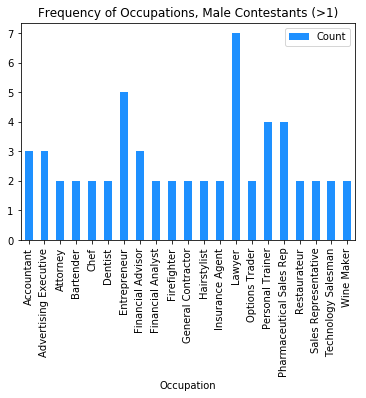

In [131]:
OccM.columns = ['Count']
OccM = OccM[OccM.Count !=1]
OccM.plot(kind ='bar', color ='dodgerblue', title='Frequency of Occupations, Male Contestants (>1)')

Next, we'll do the same for the female contestants

In [95]:
OccF = df2[['Occupation']]
OccF = OccF.groupby(['Occupation']).size()
OccF = pd.DataFrame(OccF)

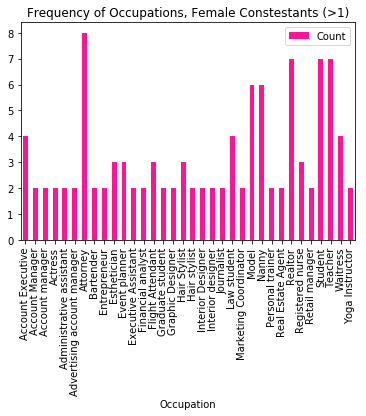

In [133]:
OccF.columns = ['Count']
OccF = OccF[OccF.Count !=1]
OccF.plot(kind ='bar', color = 'deeppink', title='Frequency of Occupations, Female Constestants (>1)')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126d0ff60>], dtype=object)

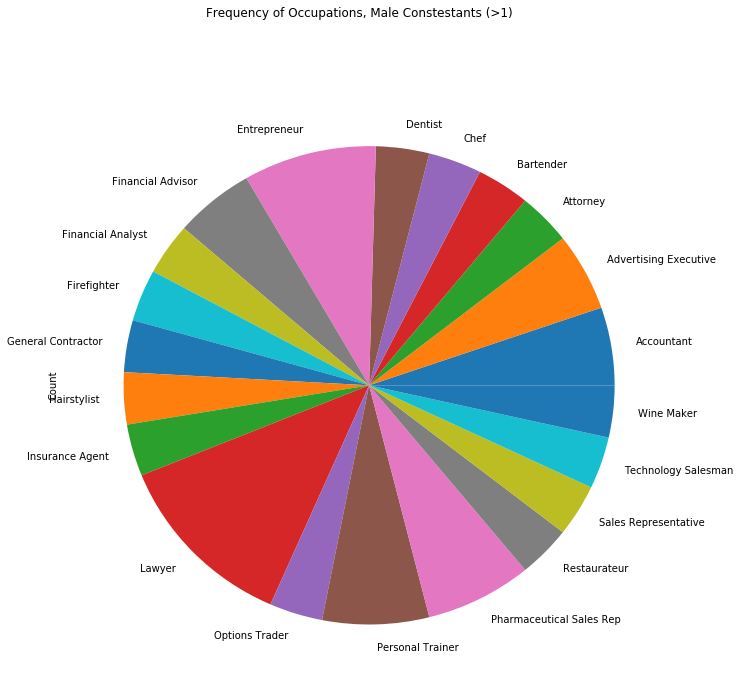

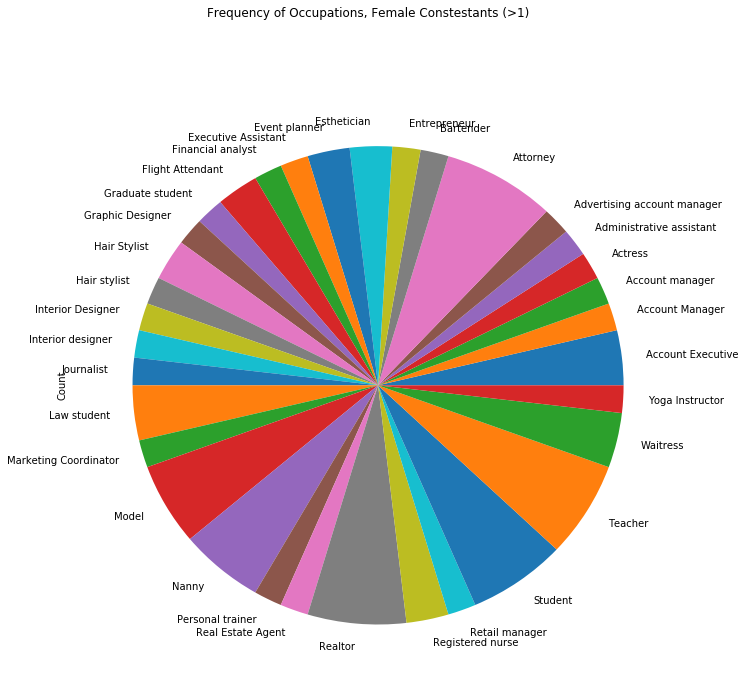

In [134]:
OccM.plot(figsize=(11,11), kind='pie', subplots=True, legend=False, title='Frequency of Occupations, Male Constestants (>1)')
OccF.plot(figsize=(11,11), kind='pie', subplots=True, legend=False, title='Frequency of Occupations, Female Constestants (>1)')

Based on the above charts, female contestants exhibit greater diversity in occupations than male contestants in total. Male contestants are more likely to have worked in finance and sales, whereas female contestants are more likely to have worked in design and education. Interestingly, for both bachelor and bachelorette contestants, Lawyer/Attorney is the mode and appears more frequently than all other occupations.  

## V. Conclusions

After analyzing the data and charts, we discovered a handful of trends in the age, occupation, and success of contestants on both The Bachelor and The Bachelorette:
- Bachelorette seasons have historically had a greater likelihood of success in terms of the number of proposals and subsequent marriages
- While the average age of female contestants is younger than the average age of male contestants in the seasons in total, the average age of both female and male contestants by week over the course of the season exhibit a similar pattern
- Female contestants exhibit greater diversity in occupation and Lawyers are the most frequently occuring profession for both male and female contestants


